In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [2]:
# Загрузим один из "игрушечных" датасетов из sklearn
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

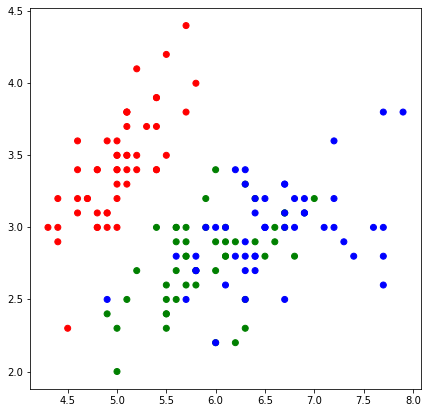

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
# Напишем функцию для вычисления точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [7]:
# Метрика Минковского
def m_metrics(x1, x2, q):
    return np.sum(np.abs(x1 - x2) ** q) ** (1 / q)

def powered_weight(x1, x2, q):
    return q ** (m_metrics(x1, x2, 2))

def inversed_weight(obj, data, a, b):
    return 1 / ((m_metrics(x1, x2, 2) + a) ** b)

In [8]:
def knn_powered_weight_distance(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
        # Введем коэффициент для вычисления весов
        q = 0.5
        # Будем использовать евклидову метрику
        p = 2
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            weight = powered_weight(x, x_train[i], q)
            distance = m_metrics(x, x_train[i], p)
            # Записываем в список значение расстояния, ответа на объекте обучающей выборки и веса 
            test_distances.append((distance, y_train[i], weight))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем сумму весов разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += d[2]
            
        # Записываем в список ответов наиболее весомый класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [9]:
def get_graph_powered_weight_distance(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_powered_weight_distance(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [10]:
k = 9

y_pred = knn_powered_weight_distance(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 9: 0.867


<ipython-input-9-ce2e6e7944d6>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


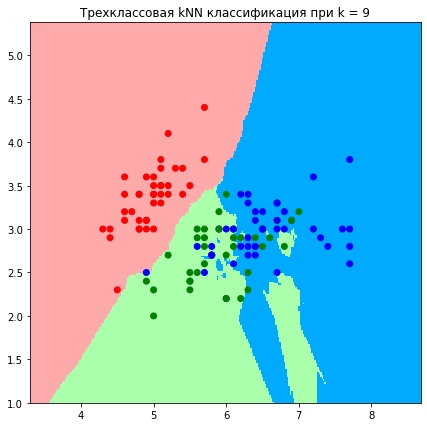

Wall time: 2min 2s


In [11]:
%%time
get_graph_powered_weight_distance(X_train, y_train, k)